<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import pandas as pd
import math
import operator
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [3]:
##### построение моделей линейной регрессии см. https://realpython.com/linear-regression-in-python/

In [4]:
#### загружаем набор данных "Ирисы Фишера"
iris_set = sns.load_dataset("iris")
### описание набора данных
### sepal- чашелистник
### petal - лепесток
### species setosa - сорт щетинистый
### species versicolour - сорт разноцветный
### species virginica - сорт виржиника

NameError: name 'sns' is not defined

In [37]:
print(iris_set)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [38]:
####  вычисляем средние значения длины и ширины чашелистников и лепестков для каждого сорта ирисов
class_feature_means = pd.DataFrame()
for c, rows in iris_set.groupby('species'):
    class_feature_means[c] = rows.mean()
    print(c)
class_feature_means  

setosa
versicolor
virginica


C:\Users\admin\AppData\Local\Temp/ipykernel_1072/2652975625.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  class_feature_means[c] = rows.mean()
C:\Users\admin\AppData\Local\Temp/ipykernel_1072/2652975625.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  class_feature_means[c] = rows.mean()
C:\Users\admin\AppData\Local\Temp/ipykernel_1072/2652975625.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  class_feature_means[c] = rows.mean()


,setosa,versicolor,virginica
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026


In [39]:
### визуализация зависимости длины лепестка от длины чашелистника каждого сорта ирисов

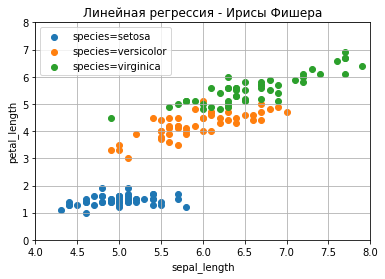

In [40]:
axes = plt.axes()
axes.set_xlim([4, 8])         
axes.set_ylim([0, 8])          
legend = []
plt.title('Линейная регрессия - Ирисы Фишера')
x_lable='sepal_length'
y_lable='petal_length'
axes.set_xlabel(x_lable)             
axes.set_ylabel(y_lable)  
for c, rows in iris_set.groupby('species'):
    plt.scatter(rows[x_lable], rows[y_lable])
    legend.append("species=%s" % c)
plt.legend(legend, loc="upper left")
plt.grid()
plt.show()

In [41]:
#### подготовка данных для построения модели линейной регрессии
x_lable='sepal_length'
y_lable='petal_length'
xxx=iris_set[x_lable].values

In [42]:
### двумерная матрица x размерности (n * 1) содержит n наблюдаемых значений объясняющей переменной (фактора) x 
x= xxx.reshape((-1, 1))
### вектор-столбец y содержит n наблюдаемых значений объясняемой переменной (результата) y 
y= iris_set[y_lable].values

In [43]:
#### для построение модели линейной регрессии
### объявляем, что model - объект класса LinearRegression
model = LinearRegression()
### вызываем метод fit для того чтобы методом наименьших квадратов обеспечить наилучшую подгонку линии регрессии 
### y^ = b₀^ +b₁^ * x к точкам поля наблюдений
model.fit(x, y)

LinearRegression()

In [44]:
#### выводим оценки b₁^ и b₀^ параметров модели b₁ и b₀, найденные методом наименьших квадратов

In [45]:
b_0_hat=model.intercept_
print('intercept:', b_0_hat) # b₀^
b_1_hat=model.coef_
print('slope:', b_1_hat) # b₁^

intercept: -7.101443369602455
slope: [1.85843298]


In [46]:
#### выводим коэффициень детерминации модели, характеризуюший ее объясняющую способность.
print('coefficient of determination:', model.score(x, y))

coefficient of determination: 0.759954645772515


In [47]:
#### предсказание значений зависимой переменной  "вручную",  с помощью модели y^ = b₀^ +b₁^ * x
y_hat = b_0_hat + b_1_hat * x
y_hat =y_hat.reshape(-1)
###print(f"predicted response:\n{y_hat}")

In [48]:
#### предсказание значений зависимой переменной  с помощью метода  predict
y_predict = model.predict(x)
print(f"predicted response:\n{y_predict}")

predicted response:
[2.37656482 2.00487822 1.63319163 1.44734833 2.19072152 2.93409471
 1.44734833 2.19072152 1.07566173 2.00487822 2.93409471 1.81903493
 1.81903493 0.88981844 3.6774679  3.49162461 2.93409471 2.37656482
 3.49162461 2.37656482 2.93409471 2.37656482 1.44734833 2.37656482
 1.81903493 2.19072152 2.19072152 2.56240812 2.56240812 1.63319163
 1.81903493 2.93409471 2.56240812 3.11993801 2.00487822 2.19072152
 3.11993801 2.00487822 1.07566173 2.37656482 2.19072152 1.26150503
 1.07566173 2.19072152 2.37656482 1.81903493 2.37656482 1.44734833
 2.74825142 2.19072152 5.90758748 4.79252769 5.72174418 3.11993801
 4.97837099 3.49162461 4.60668439 2.00487822 5.16421429 2.56240812
 2.19072152 3.8633112  4.0491545  4.2349978  3.30578131 5.35005758
 3.30578131 3.6774679  4.4208411  3.30578131 3.8633112  4.2349978
 4.60668439 4.2349978  4.79252769 5.16421429 5.53590088 5.35005758
 4.0491545  3.49162461 3.11993801 3.11993801 3.6774679  4.0491545
 2.93409471 4.0491545  5.35005758 4.60668439

In [49]:
#### проверим, совпадают ли результаты предсказания, найденные "вручную", с результатами, получпенными методом predict
print(y_hat==y_predict)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [50]:
#### зададим массив x_new, содержащий значений фактора x, 
#### для которых будут сделаны предсказания с помощью модели y^ = b₀^ +b₁^ * x
x_new= np.array([8.0,8.5,9.0])
x_new=x_new.reshape((-1,1))     
y_new = model.predict(x_new)
y_new

array([7.76602046, 8.69523695, 9.62445343])

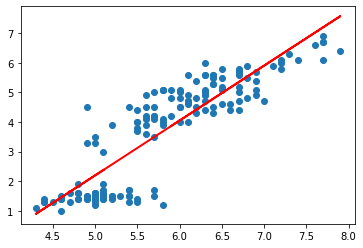

In [51]:
#### нарисуем эмпирическую линию регрессии на поле наблюдений 
plt.scatter(x,y)
plt.plot(x, model.predict(x), color='red', linewidth=2);

In [53]:
errors=y-y_predict 
sum(errors)

-5.684341886080802e-14

In [54]:
###############  проверка остатков регрессии на нормальность...

In [55]:
from scipy import stats
rez=stats.shapiro(errors)
print(rez)

ShapiroResult(statistic=0.994367778301239, pvalue=0.8309829831123352)


In [56]:
rez=stats.jarque_bera(errors)
print(rez)

Jarque_beraResult(statistic=0.3861038239409937, pvalue=0.8244391747661011)


In [57]:
from scipy import stats
rez=stats.normaltest(errors)
print(rez)

NormaltestResult(statistic=0.2534063011020061, pvalue=0.880995156711368)


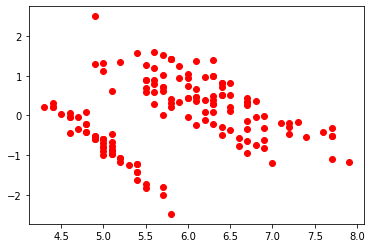

In [58]:
plt.plot( x,errors,'ro')

In [60]:
### вычисляем ESS = Errors Sum of Squares - сумму квадратов остатков (ошибок) регрессии
ESS=sum(errors**2)
print('ESS = ',ESS )

ESS =  111.45915511981853


In [61]:
### вычисляем RSS = Regression Sum of Squares -  регрессионную сумму квадратов
RSS=sum((y_predict-np.mean(y_predict)) **2)
print('RSS = ',RSS )

RSS =  352.8662448801818


In [62]:
### вычисляем TSS = Total Sum of Squares -  полную сумму квадратов
TSS=sum((y-np.mean(y)) **2)
print('TSS = ',TSS )

TSS =  464.32540000000046


In [63]:
print('ESS + RSS = ',ESS+RSS )

ESS + RSS =  464.32540000000034


In [64]:
R2=1-ESS/TSS
print('R2',R2)

R2 0.7599546457725155


In [66]:
##### строим модель зависимости длины лепестка от длины чашелистника по выборке, не содержащей данные по ирису щетинистому
##########################
iris_set = iris_set[iris_set.species !='setosa']
iris_set

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [67]:
#### подготовка данных для построения модели линейной регрессии
x_lable='sepal_length'
y_lable='petal_length'
xxx=iris_set[x_lable].values
### матрица x размерности (n * 1) содержит n наблюдаемых значений объясняющей переменной (фактора) x 
x= xxx.reshape((-1, 1))
### вектор-столбец y содержит n наблюдаемых значений объясняемой переменной (результата) y 
y= iris_set[y_lable].values

In [68]:
  #### для построение модели линейной регрессии
### объявляем, что model - объект класса LinearRegression
model = LinearRegression()
### вызываем метод fit для того чтобы методом наименьших квадратов обеспечить наилучшую подгонку линии регрессии 
### y^ = b₀^ +b₁^ * x к точкам поля наблюдений
model.fit(x, y)

LinearRegression()

In [69]:
b_0_hat=model.intercept_
print('intercept:', b_0_hat) # b₀^
b_1_hat=model.coef_
print('slope:', b_1_hat) # b₁^

intercept: -1.5557132215672373
slope: [1.03189288]


In [70]:
#### выводим коэффициент детерминации модели, характеризуюший ее объясняющую способность.
R2=model.score(x, y)
print('coefficient of determination:', R2)

coefficient of determination: 0.6863768933240111


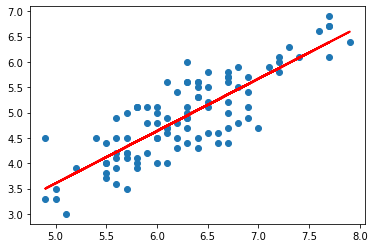

In [71]:
#### нарисуем эмпирическую линию регрессии на поле наблюдений 
plt.scatter(x,y)
plt.plot(x, model.predict(x), color='red', linewidth=2);

In [72]:
#### строим двуфакторную модель регрессии зависимости длины лепестка от длины и ширины чашелистника
iris_set = sns.load_dataset("iris")
x_lable=['sepal_length', 'sepal_width']
X2= iris_set[x_lable].values
y= iris_set['petal_length'].values
X_1= iris_set['sepal_length'].values
X_2= iris_set['sepal_width'].values

In [75]:
model = LinearRegression()
### вызываем метод fit для того чтобы методом наименьших квадратов обеспечить наилучшую подгонку модели  регрессии 
### y^ = b₀^ +b₁^ * x1 + b2^ * x2 к точкам поля наблюдений
model.fit(X2, y)
b_0_hat=model.intercept_
print('intercept:', b_0_hat) # b₀^
b_12_hat=model.coef_
print('slope:', b_12_hat) # b₁^
#### выводим коэффициент детерминации модели, характеризуюший ее объясняющую способность.
print('coefficient of determination:', model.score(X2, y))

intercept: -2.524761511833406
slope: [ 1.77559255 -1.33862329]
coefficient of determination: 0.8676860089345193


In [76]:
y_hat=b_0_hat+b_12_hat[0]*X_1+b_12_hat[1]*X_2

In [77]:
(np.mean(y),np.mean(y_hat))

(3.7580000000000005, 3.7580000000000005)

In [78]:
e=y-y_hat

In [79]:
n_size=len(y)
S_e_2=np.sum(e*e)/(n_size-3)
S_e=math.sqrt(S_e_2)

n_size

150

In [80]:
X_matr=np.ones((n_size, 3))
###X_matr
for i in range(n_size):
    X_matr[i][1]=X_1[i]
    X_matr[i][2]=X_2[i]

In [81]:
## X_matr

In [82]:
X_matr_trans=X_matr.transpose()

In [83]:
X_matr_trans

array([[1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. ],
       [5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       

In [88]:
import numpy as np
from scipy import linalg
Z=X_matr_trans.dot(X_matr)
print(Z)
###
Z_inv =linalg.inv(Z)

[[ 150.    876.5   458.6 ]
 [ 876.5  5223.85 2673.43]
 [ 458.6  2673.43 1430.4 ]]


In [85]:
EEE=Z.dot(Z_inv)

In [89]:
EEE

array([[ 1.00000000e+00, -9.41437213e-16,  3.02561833e-15],
       [-2.64628527e-14,  1.00000000e+00,  1.41577835e-14],
       [ 1.80821092e-14, -7.00372618e-15,  1.00000000e+00]])

In [90]:
se_b_0_hat=S_e*math.sqrt(Z_inv[0][0])

In [91]:
se_b_1_hat=S_e*math.sqrt(Z_inv[1][1])

In [92]:
se_b_2_hat=S_e*math.sqrt(Z_inv[2][2])

In [93]:
(se_b_0_hat,se_b_1_hat,se_b_2_hat)

(0.5634396596051613, 0.06440502791825113, 0.12235775955536096)